In [1]:
# Add lib input sys.path
import os
import sys

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

from scipy.spatial import distance

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from matplotlib.colors import ListedColormap
import libs.linear_models as lm
import libs.data_util as data
import libs.nn as nn
import libs.plot as myplot

%matplotlib inline

#### Exercise 6.1

* (a) Let $x=(0,1), x'=(0.01,1)$, then we have the Euclidean distance $d(x,x')=\|x-x'\| = 0.01$ and the cosine similarity $\text{CosSim}(x,x')=\frac{x\cdot x'}{\|x\|\|x'\|} \approx 0.99995$

They have very high cosine similarity but very low Euclidean distance similarity.

Let $x=(1,0), x'=(-1,0)$, then we have the Euclidean distance $d(x,x')=\|x-x'\| = 2$ and the cosine similarity $\text{CosSim}(x,x')=\frac{x\cdot x'}{\|x\|\|x'\|} = -1$

In [4]:
#### Exercise 6.1
x = np.array([0,1])
y = np.array([0.01, 1])

d = np.linalg.norm(x-y)
print('Euclidean distance: ', d)

xdoty = np.dot(x,y)
cos = xdoty/np.linalg.norm(x)/np.linalg.norm(y)
print('Cosine similarity: ', cos)

Euclidean distance:  0.01
Cosine similarity:  0.9999500037496877


#### Exercise 6.1

* (b) Suppose we have $x,y$ w.r.t. the original origin. If the origin of the coordinate system changes, suppose we move the origin to $P$, then we have w.r.t. the new origin, $x'=x-P, y'=y-P$, so it's easy to see that the Euclidean distance similarity doesn't change. The cosine similarity however changes, this can be seen by checking two vectors perpendicular to each other, if we move to a new origin, they don't perpendicular to each other anymore. 

This puts some restriction on the choice of features, if we want to use cosine similarity, we can't change their magnitude, e.g. mean subtraction, this may affect some algorithms which may perform badly given large differences between different features. 

#### Exercise 6.2

Given a test point $(x,y)$ (Generated from $P(x)$ and $\pi(x)=P[y=1|x]$) and the target function $f(x)$, The probability of error on a test point $x$ is: 

\begin{align*}
e(f(x)) &=P[f(x)\ne y] \\
&= P[f(x)=1,y=-1] + P[f(x)=-1,y=1] \\
&= P(y=-1)1(\pi(x)\ge \frac{1}{2}) + P(y=1)1(\pi(x) < \frac{1}{2}) \\
&= (1-\pi(x))1(\pi(x)\ge \frac{1}{2}) + \pi(x)1(\pi(x) < \frac{1}{2}) \\
&= \min(\pi(x), 1-\pi(x))\\
\end{align*}

For any other hypothesis $h$ (deterministic or not), we apply the same calculation, and have 

\begin{align*}
e(h(x)) &=P[h(x)\ne y] \\
&= P[h(x)=1,y=-1] + P[h(x)=-1,y=1] \\
&= P(y=-1)P(h(x)=1) + P(y=1)(1-P(h(x)=1)) \\
&= (1-\pi(x))P_1 + \pi(x)(1-P_1) \\
&= \pi(x)+(1-2\pi(x))P_1\\
\end{align*}

Where $P_1 = P(h(x)=1)$, If $\pi(x) \ge \frac{1}{2}$, then $1-2\pi(x) \le 0$, and $\pi(x)+(1-2\pi(x))P_1 \ge \pi(x) + (1-2\pi(x)) = 1-\pi(x)$, since $P_1 \le 1$.

If $\pi(x) < \frac{1}{2}$, then $1-2\pi(x) > 0$, and $\pi(x)+(1-2\pi(x))P_1 \ge \pi(x)$, since $P_1 \ge 0$. 

So we conclude that: $e(h(x)) \ge e(f(x))$.

#### Exercise 6.3 TODO

#### Exercise 6.4

The method will always pick $k=1$, where the $E_{in}=0$ for any data.  So the hypothesis set doesn't depend on the data. It can't find usefule $k$.

#### Exercise 6.5

* (a) Since we are selecting hypothesis from a fixed set of $\mathcal{H}_{train}$, there are $N-K$ hypotheses and the validation data set is the 'input data set', which has a size of $K$. We apply the generalization bound equation (2.1), and for any $g^-_k, k=1,2,\dots,N-K$, we have 

$E_{out}(g^-_k) \le E_{val}(g^-_k) + \sqrt{\frac{1}{2K}\ln\frac{2(N-K)}{\delta}}$

If we assume $\frac{K}{\log(N-K)}\to \infty$, then we have $E_{out}(g^-_k) \approx E_{val}(g^-_k)$

Since $g^-$ is the hypothesis with minimum validation error $E_{val}(g^-)$, so we have 

$E_{out}(g^-) \approx E_{val}(g^-) \le E_{val}(g^-_*) \approx E_{out}(g^-_*)$

On the other hand, $g^-_*$ minimizes $E_{out}$, so we always have $E_{out}(g^-_*) \le E_{out}(g^-)$

Compare the two inequalities, we conclude $E_{out}(g^-) \approx E_{out}(g^-_*)$.


* (b) If $N-K\to \infty$, according to Theorem 6.2, we can find a $k(N-K)$, such that $k(N-K)\to \infty$ and $\frac{k(N-K)}{N-K} \to 0$, then we know that $E_{in}(g^-_k) \to E_{out}(g^-_k)$ and $E_{out}(g^-_k) \to E^*_{out}$.

Since $E^*_{out}$ is the optimal out-of-sample error we can ever achieve, so we know that $E_{out}(g^-_k) \approx E_{out}(g^-_*)$, by problem (a), we thus conclude $E_{out}(g^-) \approx E^*_{out}$

* If we used the $k^--NN$ rule on the full data set $\mathcal{D}$, we would see performance improvement because the learning curve tells us we should use more data to achieve better performance. 

#### Exercise 6.6

In a 10-fold cross validation, suppose we have data folds as $D_1, \dots, D_{10}$, each fold will have $\frac{N}{10}$ data points. For a given $k$ and a given fold $D_i$, for each point $x$ in $D_i$, we need compute its distance with all other points in $d$ dimension, which requires $O(Nd)$ computations. We then need select the smallest $k$ distances, which requires $O(N\log k)$ computations. So for each point in fold $D_i$, we need $O(Nd+N\log k)$ computations. 

We need to do the same for all $\frac{N}{10}$ points in fold $D_i$, so the total computation for a given fold is $O(\frac{N}{10}(Nd+N\log k))$, with 10 folds, we have total cost of $O(N^2d+N^2\log k)$ for a given $k$.


Now sum up over $k$, we have the total cost

$T=\sum^{\frac{N+1}{2}}_{j=1} O(N^2d+N^2\log (2j-1)) = O(N^2d\frac{N+1}{2}) + O(N^2\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1))$

The first term is approximately on the order of $O(N^3d)$

For the second term, we have $\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1)) \approx \sum^{\frac{N+1}{2}}_{j=1}\log (2j)) \approx \frac{N+1}{2}\log 2 + \log (\frac{N+1}{2})!$

By Sterling approximation formula, we have $\ln n! = n\ln n - n + O(\ln n)$, so 

$\log (\frac{N+1}{2})! \approx \frac{N+1}{2}\log \frac{N+1}{2} - \frac{N+1}{2} + O(\log \frac{N+1}{2}) = O(N\log N - N)$

Then $O(N^2\sum^{\frac{N+1}{2}}_{j=1}\log (2j-1)) = O(N^2(N\log N - N)) = O(N^3\log N - N^3)$

Adding up with the first term, we have $T=O(N^3d + N^3\log N)$

#### Exercise 6.7

* (a) If $S$ is not training set consistent, and if $x_*$ is a point which is not training set consistent, so we have $g_S(x_*) \ne g_{\mathcal{D}}(x_*)$. According to CNN heuristic, we can find the nearest data point to $x_*$ which is not in $S$ and has class $g_{\mathcal{D}}(x_*)$. We need to prove that such a point exists.

We first fix the number of nearest neighbors to $k$, and consider the neighborhood of $N_S$ in $S$ and $N_{\mathcal{D}}$ in $\mathcal{D}$, both $N_S$ and $N_{\mathcal{D}}$ have the same number of points, i.e. $k$. 

We say $N_S$ and $N_{\mathcal{D}}$ are not equal to each other, otherwise, $x_*$ won't be an inconsistent point. So there must be some point that is in $N_{\mathcal{D}}$ but not in $N_S$.

Now we say that among these points that not in $S$, there must be a point $x'$ such that $g_{\mathcal{D}}(x') = g_{\mathcal{D}}(x_*)$. 

If no such point exists, then all the points in $N_{\mathcal{D}}$ but not in $N_S$ will have the class $g_S(x_*)$. Suppose the intersection of $N_{\mathcal{D}}$ and $N_S$ has $m$ points, then $k-m$ points in $N_{\mathcal{D}}$ will have class $g_S(x_*)$, when it combines with the intersection of $m$ points, we will definitely find that the class of $x_*$ in $\mathcal{D}$ to be $g_D(x_*)$ = g_S(x_*)$, because $N_S$ is composed of $k-m$ points plus the same $m$ points, but gives $x_*$ a class of $g_S(x_*)$ without requiring the $k-m$ points to be all in class $g_S(x_*)$.

This is the contradiction, so we proved that the CNN heuristic will surely find a point $x'$ that is not in $S$ and has class $g_D(x_*)$$

* (b) Since the set $S$ is a subset of $\mathcal{D}$, so for any of the $k$ nearest neighbors to $x_*$ from $\mathcal{D}$, i.e. $N_{\mathcal{D}}$, if it belongs to $S$, it must belong to the neighbord from $S$ as well, i.e. $N_S$. So the new nearest neighbors added to $S$, will become neighbors of $x_*$ in $N_S$.


* (c) Since there are total $N$ points, from problem (a), each step will add at most 1 point into the original $k$ points in $S$ if $S$ is still not training set consistent, and also the $N$ points is the set of $\mathcal{D}$, which automatically satisfies the training set consistency. So after at most $N-k$ iterations, the CNN heuristic must termiate with a training set consistent $S$.

#### Exercise 6.8

* (a) Pseudo code for the recursive branch and bound search for the nearest neighbor.

  * Given a test point $x$, we search for its nearest neighbor in the data set $D$.
  * We look for algorithm called $F(S, x)$ to find the nearest neighbor of $x$ in a given cluster $S$. Let's initialize with the whole data set as our first cluster $\mathcal{D}$. From clustering algorithm, we should know its two children clusters, their centers, $\mu_1,\mu2$, and radii $r_1,r_2$.
  * Here is how we implement $F(S,x)$:
     1. Set the nearest neighbor be $x_{nn} = \text{None}$ as in python.
     2. If the input cluster has no children cluster, i.e. it has at most 2 data points
       * Find the nearest neighbor in the cluster by computing the distance from $x$ to all the points in the cluster. There are at most 2 computations needed since we assume every cluster with more than 2 points is split into 2 sub-clusters. 
       * Return this point as the nearest neighbor $x_{nn}$ in the input cluster to $x$
     3. Else, suppose the two children clusters of input cluster are: $S_1, S_2$
       * If $\|x-\mu_1\|  \le \|x-\mu_2\|$: 
         * let $x_{nn} = F(S_1, x)$
       * Else: let $x_{nn} = F(S_2, x)$
     4. Now we have $x_{nn}$, let's call the sibling cluster of $S$ be $S^*$, let's compute the bound condition
     5. If $\|x-x_{nn}\| > \| x - \mu^*\| - r^*$: (Need check cluster $S^*$ for the nearest neighbor)
       * $x^*_{nn} = F(S^*, x)$
       * If $\|x-x^*_{nn}\| < \|x-x_{nn}\|$: $x_{nn} = x^*_{nn}$
     6. Return $x_{nn}$
  4. We call $F(S, x)$ with $S =\mathcal{D}$ to get the nearest neighbor in the data set to $x$
  
* (b) If the sub-clusters of a cluster are balanced, and assume the number of data points is power of 2, i.e. $N=2^k$, the maximum depth of the recursive search for a nearest neighbor can be $\log_2 N = k$

* (c) If we have balanced sub-clusters and if the bound conditions always hold, then the if-condition in step 5 will be always False, so we just need to go through $\log N$ steps, each with a computation of $d$ for distance in the $R^d$ space. The total cost is thus $d\log N$

* (d) To apply the branch and bound algorithm to $k$-nearest neighbors, we can apply the above algorithm iteratively, first, find the nearest neighbor, remove this point from the cluster, then find the nearest neighbor in the rest of points, continue this for $k$ times to find all the $k$-nearest neighbors. So the best case cost will be $kd\log N$


#### Exercise 6.9

* (a) $e(f(x)) = P[f(x)\ne y] = \sum^C_{c=1}P[y=c, f(x)\ne c]$, since $f(x) = \text{argmax}_c \pi_c(x)$, suppose $f(x) = m$, where $\pi_m(x) =\max_c \pi_c(x)$, so in the error term, as long as $c_i \ne m$, we'll have $f(x)\ne c$, so we have

$e(f(x)) = \sum^C_{c=1}P[y=c, f(x)\ne c] = \sum_{c\ne m}P[y=c] = \sum_{c\ne m}\pi_c(x) = 1 - \pi_m(x) = \eta(x)$

* (b) Suppose the nearest neighbor for $x$ is $x_{[1]}$

\begin{align*}
e(g_N(x)) &= P[g_N(x)\ne y]  \\
&= \sum^C_{c=1} P[y=c, g_N(x)\ne c] \\
&= \sum^C_{c=1} P[y=c, y_{[1]}\ne c] \\
&= \sum^C_{c=1} P[y=c]P[y_{[1]}\ne c] \\
&= \sum^C_{c=1} \pi_c(x)(1-\pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x) - \pi_c(x)\pi_c(x_{[1]}) \\
&= \sum^C_{c=1} \pi_c(x) - \pi^2_c(x) + \pi^2_c(x) - \pi_c(x)\pi_c(x_{[1]}) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \pi_c(x)(\pi_c(x) - \pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \sum^C_{c=1}\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]})) \\
&= \sum^C_{c=1} \pi_c(x)(1- \pi_c(x)) + \epsilon_N(x) \\
\end{align*}

Observe that 

\begin{align*}
|\epsilon_N(x)| &= |\sum^C_{c=1}\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}|\pi_c(x)(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}\pi_c(x)|(\pi_c(x) - \pi_c(x_{[1]}))|\\
&\le \sum^C_{c=1}\pi_c(x)\max_c|(\pi_c(x) - \pi_c(x_{[1]}))|\\
&= \max_c|(\pi_c(x) - \pi_c(x_{[1]}))| \sum^C_{c=1}\pi_c(x)\\
&= \max_c|(\pi_c(x) - \pi_c(x_{[1]}))|\\
\end{align*}

When $N\to \infty$, we expect $\epsilon_N(x) \to 0$ because when the data set gets very large, every point $x$ has a nearest neighbor that is close by. That is, we have $x_{[1]}(x) \to x$ for all $x$. This is the case if $P(x)$ has bounded support. 

By the continuity of $\pi(x)$, This indicates that $\pi_c(x_{[1]}) \to \pi_c(x)$ and since $|\epsilon_N(x)| \le |\max_c|(\pi_c(x) - \pi_c(x_{[1]}))||$, it follows that $\epsilon_N(x) \to 0$.

So we conclude that $e(g_N(x)) \to \sum^C_{c=1} \pi_c(x)(1- \pi_c(x))$ when $N\to \infty$ with high probability according to the law of large number.


* (c) We first prove that for $C$ numbers of $a_i,i=1,\dots,C$, we have $C\sum a^2_i \ge (\sum a_i)^2$. This can be proved by notice that for $a_i$, we always have 

\begin{align*}
\sum^C_{i=1}\sum^C_{j=1} (a_i - a_j)^2 &\ge 0\\
\sum^C_{i=1}\left(Ca^2_i + \sum^C_{j=1} a^2_j - \sum^C_{j=1}2a_i a_j\right) &\ge 0 \\
2C\sum^C_{i=1}a^2_i - 2\sum^C_{i=1}a_i\sum^C_{j=1}a_j&\ge 0 \\
C\sum^C_{i=1}a^2_i &\ge (\sum^C_{i=1}a_i)^2\\
\end{align*}

Since we also have $\sum a_i = 1$, apply above inequality to $a_2,a_3,\dots, a_C$, we have


$(C-1)\sum_{i\ne 1} a^2_i \ge (\sum_{i \ne 1} a_i)^2$, add $(C-1)a^2_1$ to both sides we have

$(C-1)\sum a^2_i \ge (C-1)a^2_1 + (\sum_{i \ne 1} a_i)^2 = (C-1)a^2_1 + (1-a_1)^2$. Divide both sides by $C-1$, we have

$\sum a^2_i \ge a^2_1 + \frac{(1-a_1)^2}{C-1}$. 

Now take expectation w.r.t. $x$ on $g_N(x)$, we have 

\begin{align*}
E_{out}(g_N(x)) &= E_{out}[\sum^C_{c=1}\pi_c(x)\left(1-\pi_c(x)\right)] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[\sum^C_{c=1}(\pi_c(x)- \pi^2_c(x))] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[1 - \sum^C_{c=1}\pi^2_c(x)] + E_{out}[\epsilon_N(x)]\\
\end{align*}

Apply the above inequality, we have 

\begin{align*}
E_{out}(g_N(x)) &= E_{out}[1 - \sum^C_{c=1}\pi^2_c(x)] + E_{out}[\epsilon_N(x)]\\
&\le E_{out}[1 - (\pi^2_1(x) + \frac{(1-\pi_1(x))^2}{C-1}) ] + E_{out}[\epsilon_N(x)]\\
\end{align*}

From problem (a), we have $\eta(x) = 1 - \pi_1(x)$, take this into above inequality, we have

\begin{align*}
E_{out}(g_N(x)) &\le E_{out}[1 - (\pi^2_1(x) + \frac{(1-\pi_1(x))^2}{C-1}) ] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[1 - (1-\eta(x))^2 - \frac{\eta(x)^2}{C-1}] + E_{out}[\epsilon_N(x)]\\
&= E_{out}[2\eta(x) - \frac{C\eta(x)^2}{C-1}] + E_{out}[\epsilon_N(x)]\\
&= 2E^*_{out} - \frac{C}{C-1}(E_{out}[\eta(x)^2]) + E_{out}[\epsilon_N(x)]\\
&\le 2E^*_{out} - \frac{C}{C-1}(E^*_{out})^2 + E_{out}[\epsilon_N(x)]\\
\end{align*}

Where $E^*_{out} = E_{out}[\eta(x)]$ and we have used $E_{out}[\eta^2(x)] \ge (E_{out}[\eta(x)])^2 = (E^*_{out})^2$

As $N \to \infty$, we have $E_{out}[\epsilon_N(x)] \to 0$, so 

$E_{out}(g_N(x)) \le 2E^*_{out} - \frac{C}{C-1}(E^*_{out})^2 $

This demonstrates that for multiclass problem, the simple nearest neighbor is at most a factor of 2 from optimal.

#### Exercise 6.10

* (a) When $k=1$, we have $g(x)=y_{[1]}(x)$, at each data point $x=x_i$, we have $g(x_i) = y_{[1]}(x_i) = y(x_i)$, so $E_{in}= \sum |g(x_i)-y(x_i)|^2 = 0$

* (b) The final hypothesis is not smooth, because as we increase $x$, their nearest neighborhoods is changing, within an interval, for all $x$ in that interval, their $k$ nearest neighbors are fixed, so we have constant average from these $k$ nearest neighbors for $g(x)$ within the interval. But once we move out of the interval, new neighbor joined and one old neighbor dropped, the average of the neighborhood immediately changed, so we see the step-wise pattern in the final hypothesis.

* (c) If $k$ is very small, say, 1, 2, the final hypothesis $g$ is very unsmooth, it can match the data points closely (or exactly if $k=1$), but the approximation to $f$ can be very bad because it tries too hard to fit the noises.

If $k$ is very large, the final hypothesis $g$ approaches the average of the whole data set, which is a constant, this is too simplistic to approximate the target function $f$.

* (d) If $x\to \infty$, or $x\to -\infty$, the nearest neighbors for $x$ will be a fixed set of points, i.e. the data points at two ends. So the hypothesis will generate constant values for $x$ going large at both ends. 


#### Exercise 6.11

$\alpha_n (x) = \phi(\frac{|x-x_n|}{r}) = e^{-\frac{1}{2}(\frac{|x-x_n|}{r})^2}$

Let's assume $|x-x_1| \le |x-x_2| \le \dots \le |x-x_N|$, i.e. point $x_1$ is the nearest neighbor of $x$, and $x_N$ is the farest neighbor. Then we have $\phi(\frac{|x-x_1|}{r}) \ge \dots \ge \phi(\frac{|x-x_n|}{r})$, i.e. $\alpha_1(x) \ge \dots \ge \alpha_N(x)$. 

Then $\frac{\alpha_n(x)}{\alpha_1(x)} = e^{-\frac{1}{2}\frac{|x-x_n|^2-|x-x_1|^2}{r^2}} \to 0 $ when $r\to 0$ if $n\ne 1$, and $\frac{\alpha_n(x)}{\alpha_1(x)} = 1$ if $n=1$.

We thus have 

\begin{align*}
g(x) &= \frac{\sum^N_{n=1}\alpha_n(x)y_n}{\sum^N_{m=1}\alpha_m(x)}\\
&= \frac{\sum^N_{n=1}\frac{\alpha_n(x)}{\alpha_1(x)}y_n}{\sum^N_{m=1}\frac{\alpha_m(x)}{\alpha_1(x)}}\\
&\to \frac{y_n}{1}\; \text{when }\; r\to 0\\
&= y_n\\
\end{align*}

This is the same as the nearest neighbor rule.

#### Exercise 6.12

* (a) For nonparametric RBF, $g(x)$ is always a weighted sum of $y_n$, as $|x| \to \infty$, all $|x-x_n|$ are equal to each other, so the weights are uniform, in such case, $g(x) = \frac{1}{N}\sum y_n$, the average of $y_n$.

For the parametric RBF, each $\Phi_n(x) \to 0$ when $|x| \to \infty$, and the weights $w_n$ are constants, so the RBF goes to 0 as well.

* (b) Note $Z_{nj}=\Phi_j(x_n)$, $Z$ is a $N\times N$ matrix, where its $n$th row is $\Phi^T(x_n) = \begin{bmatrix} \Phi_1(x_n) & \Phi_2(x_n) & \dots & \Phi_n(x_n) & \dots & \Phi_N(x_n)\end{bmatrix}$. 

So its $n$th column is just $\Phi(x_n)$. So we have $Z^T=\begin{bmatrix}\Phi(x_1) & \Phi(x_2) & \dots & \Phi(x_n) & \dots & \Phi(x_N)\end{bmatrix}$

If $Z$ is invertible, we have $(Z^T)^{-1}Z^T=I$, and $(Z^T)^{-1}\Phi(x_n)=\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 0 \end{bmatrix}$, where the only 1 is at the $n$th position.

So we obtain 

$g(x_n)=w^T\Phi(x_n) = (Z^{-1}y)^T\Phi(x_n) = y^TZ^{-T}\Phi(x_n) = y^T\begin{bmatrix}0 \\ \dots \\ 0 \\ 1 \\ \dots \\ 0 \end{bmatrix} = y_n$

So $g(x)$ exactly interpolates the data points. 

* (c) The nonparametric RBF does NOT always have $E_{in}=0$, $g(x)$ is always a weighted sum of $y_n$, at $x=x_k$, $g(x_k)$ is still a weighted sum of $y_n$s, so we don't have $g(x_k)=y_k$ here. 

#### Exercise 6.13

* (a) $E_{in}(S_1,\dots,S_k;\mu_1,\dots,\mu_k) = \sum^k_{j=1}E_j = \sum^k_{j=1} \sum_{x_n \in S_j} \|x_n -\mu_j\|^2$. If we fix the clusters to $S_1,\dots, S_k$, take derivatives of $E_{in}$ w.r.t. $\mu_j$, we have

\begin{align*}
\frac{\partial{E_{in}}}{\partial{\mu_j}} &= \sum_{x_n \in S_j} 2\mu_j - 2x_n\\
\end{align*}

Let it equal to 0, we have $\mu_j = \frac{1}{|S_j|}\sum_{x_n \in S_j} x_n$ are the centroids of the clusters and minimize $E_{in}$.

* (b) If we fix the centers to $\mu_1, \dots, \mu_k$. Then the clusters which minimize $E_{in}$ are obtained by placing into $S_j$ all points for which the closest center is $\mu_j$, breaking ties arbitrarily. 

Suppose this is not true, there must exist a point that doesn't belong to the cluster which has the closest center to it. Let's call the point $x^*$, and its closest center $\mu_j$, such that $\|x^* - \mu_j\| \le \|x^* - \mu_l\|$ for $l=1,\dots, k$. Under our assumption, $x^* \notin S_j$.

There must exist another cluster, e.g. $S_i$, such that $x^* \in S_i$, and $\|x^* - \mu_j\| \le \|x^* - \mu_i\|$.

We can compare $E_i,E_j$ components in $E_{in}$, where

$E_i = \sum_{x_n \in S_i} \|x_n -\mu_i\|^2$ and $E_j = \sum_{x_n \in S_j} \|x_n -\mu_j\|^2$.

It's clear that $E_i + E_j$ doesn't achieve its minimum value under the assumption. Because if we just put $x^*$ into $S_j$, we replace $\|x^* - \mu_i\|^2$ with $\|x^* - \mu_j\|^2$, which is clearly less than the former. So we reduce the sum of $E_i+E_j$ and thus $E_{in}$. 

We conclude that for all points,we should put them into the cluster that has the cloest center.


#### Exercise 6.14

* Step 2 of Lloyd's Algorithm: According to exercise 6.13 (b), if we construct $S_j$ to be all points closest to $\mu_j$, we minimize $E_{in}$ with fixed $\mu_1,\dots, \mu_k$, which won't increase $E_{in}$.

* Step 3: From exercise 6.13(a), when we have fixed clusters of $S_1,\dots, S_k$, if we choose each $\mu_j$ to be the centroid of $S_j$, we minimize $E_{in}$ with fixed clusters. The $E_{in}$ will not increase.

Also, there are only finite number of different partitions for the data points, So the Lloyd's algorithm won't run forever, it must eventually stop iterating. 


#### Exercise 6.15

If we initialize $\gamma_{nj}=\frac{1}{k}$, then we have $N_j = \frac{N}{k}$, and $w_1=\dots = w_k=\frac{1}{k}$, All the $\mu_j,\Sigma_j$ are the mean and variance of the full data set, i.e. $\mu_j = \frac{1}{N}\sum x_n$ for $j=1,\dots,N$. So $\mu_1=\dots = \mu_N = \mu$, and $\Sigma_1 = \dots = \Sigma_N = \Sigma$.

The probabilities of $x_n$ given a cluster membership $j$, are all the same for different clusters, i.e. $P(x_n|S_1)=\dots = P(x_n|S_N) = N(x_n; \mu, \Sigma)$. 

So the in the next iteration $\gamma_{nj}(t+1) = \frac{1}{k} = \gamma_{nj}(t)$. 

The $\gamma$ will stay constant in all iterations. 

So in the end, all $k$ clusters, will have the same center and shape. The final probability density estimate is just a Gaussian model with data mean and variance, not a mixed of multiple Gaussian models.

#### Problem 6.1

See the plots below

In [3]:
#### Problem 6.1 (a)
df = pd.DataFrame({'x1':[1, 0, 0, -1, 0, 0, -2], 'x2':[0, 1, -1, 0, 2, -2, 0], 'y':[-1, -1, -1, -1, 1, 1, 1]})
xsp1 = df.loc[df['y']==1]['x1'].values
ysp1 = df.loc[df['y']==1]['x2'].values
xsm1 = df.loc[df['y']==-1]['x1'].values
ysm1 = df.loc[df['y']==-1]['x2'].values

#plt.tight_layout()
X_train = df[['x1', 'x2']].values
y_train = df['y'].values

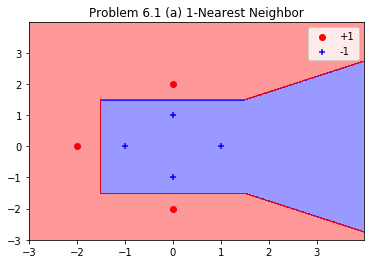

In [3]:
#f, axs = myplot.create_sub_plots(1, 1, 1)
# Fine-tune figure; make subplots farther from each other.    
#f.subplots_adjust(hspace=1, wspace=2)

cls = nn.NearestNeighbors(X_train, y_train, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (a) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

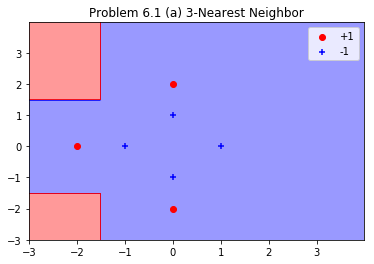

In [4]:
cls = nn.NearestNeighbors(X_train, y_train, 3)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (a) 3-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

In [5]:
#### Problem 6.1 (b)
def nonlinear_transform_6_1(X):
    #X is Nxd
    Z = np.zeros(X.shape)
    for idx in np.arange(X.shape[0]):
        x1, x2 = X[idx, 0], X[idx, 1]
        z1 = np.sqrt(x1**2 + x2**2)
        z2 = np.arctan(x2/x1)
        Z[idx, 0] = z1
        Z[idx, 1] = z2
    return Z

Z = nonlinear_transform_6_1(df[['x1', 'x2']].values)
df['z1']= Z[:, 0]
df['z2']= Z[:, 1]
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in longlong_scalars
  


,x1,x2,y,z1,z2
0,1,0,-1,1.0,0.000000
1,0,1,-1,1.0,1.570796
2,0,-1,-1,1.0,-1.570796
3,-1,0,-1,1.0,-0.000000
4,0,2,1,2.0,1.570796
5,0,-2,1,2.0,-1.570796
6,-2,0,1,2.0,-0.000000


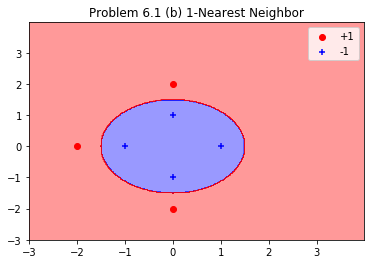

In [7]:
X_train = df[['z1', 'z2']].values
y_train = df['y'].values

cls = nn.NearestNeighbors(X_train, y_train, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls, nonlinear_transform_6_1, alpha = 0.4)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (b) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

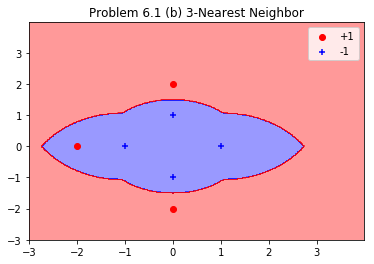

In [8]:
cls = nn.NearestNeighbors(X_train, y_train, 3)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls, nonlinear_transform_6_1, alpha = 0.4)
myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.1 (b) 3-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

#### Problem 6.2

* (a) $\mu_{-1} = (0, 0), \mu_1 = (-\frac{2}{3}, 0)$

From the graph, we see that 3 points are mis-classified. 

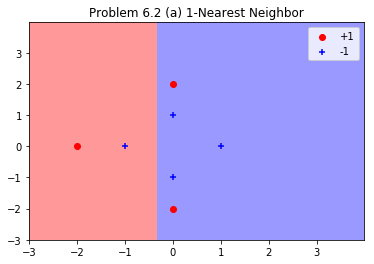

In [14]:
#### Problem 6.2

df_c = pd.DataFrame({'x1':[0, -2/3], 'x2':[0,0], 'y':[-1, 1]})
X_train_c = df_c[['x1', 'x2']].values
y_train_c = df_c['y'].values


cls = nn.NearestNeighbors(X_train_c, y_train_c, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.2 (a) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

#### Problem 6.2

* (b) We start with merging two closest points of the same class. From the graph below, we see 2 points are misclassified.

Prototype for -1:  [[0. 0.]]
Prototype for +1:  [[-0.5 -0.5]]


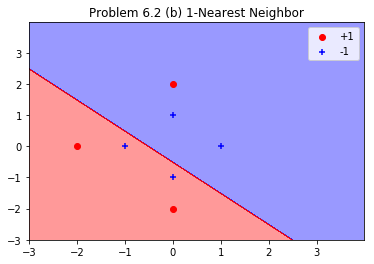

In [7]:
#### Problem 6.2

m1_proto = nn.create_prototypes(df.loc[df['y']==-1][['x1','x2']].values)
p1_proto = nn.create_prototypes(df.loc[df['y']==1][['x1','x2']].values)
print('Prototype for -1: ', m1_proto)
print('Prototype for +1: ', p1_proto)

prototypes = np.vstack([m1_proto, p1_proto])
X_train_p = prototypes
y_train_p = np.array([-1, 1])


cls = nn.NearestNeighbors(X_train_p, y_train_p, 1)
x1_min, x1_max = -3, 4
x2_min, x2_max = -3, 4
xx1, xx2 = myplot.get_grid(x1_min, x1_max, x2_min, x2_max, step=0.02)
myplot.plot_decision_boundaries(xx1, xx2, 2, cls)

myplot.plt_plot([xsp1, xsm1], [ysp1, ysm1], 'scatter', 
               colors = ['r', 'b'], markers = ['o', '+'], labels = ['+1', '-1'], 
               title = "Problem 6.2 (b) 1-Nearest Neighbor", yscale = None, ylb = -2, yub = 2,
               xlb = -2, xub = 2, xlabel = None, ylabel = None,
               legends = ['+1', '-1'], legendx = None, legendy = None)

In [49]:
import numpy as np

a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
index = [2]

#new_a = np.delete(a, index)
new_a = np.delete(a, ([1,2]), axis=0)


In [50]:
a, new_a

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), array([[1, 2, 3]]))